In [1]:
from pathlib import Path

ck_path = Path('checkpoint')
json_paths = list(ck_path.rglob("*.json"))

In [2]:
import json

results = {}
for json_path in json_paths:
    with open(json_path, "r") as result_json:
        result = json.load(result_json)
    results[f'{json_path.parent.stem}'] = result

In [3]:
import json

import matplotlib.pyplot as plt

def visualize_results(results, selects):
    keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
    fig, axes = plt.subplots(nrows=1, ncols=len(keys), figsize=(20,4))
    for col, key in zip(axes, keys): 
        for name, result in results.items():
            if name in selects:
                col.plot(range(20, 20+len(vals:=result[key][20:])), vals, label=f"{name}")
        col.set_title(key, fontsize=16)
    handles, labels = col.get_legend_handles_labels()
    plt.legend(handles, labels, loc='best')
    plt.tight_layout()

def print_results(results, selects):
    keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
    print('name'.center(15), end='|')
    for key in keys:
        print(f"{key:^15}", end='|')
    print()
    for name, result in results.items():
        if name in selects:
            print(f"{name:^15}", end='|')
            idx = result['test_loss'].index(min(result['test_loss']))
            for key in keys:
                print(f"{result[key][idx]:^15.4f}", end='|')
            print()

      name     |  train_loss   |   test_loss   |     dice      |      vs       |      asd      |      hd       |
   big_unet    |    0.0980     |    0.1517     |    0.8987     |    0.9140     |    0.4874     |    12.4487    |
   baseline    |    0.0945     |    0.1584     |    0.8929     |    0.9087     |    0.5142     |    12.2340    |
    deeplab    |    0.1319     |    0.1786     |    0.8725     |    0.8878     |    0.5945     |    12.0372    |
   deep_unet   |    0.0782     |    0.1731     |    0.8962     |    0.9087     |    0.5028     |    11.7808    |
    hardnet    |    0.0754     |    0.1935     |    0.8721     |    0.8958     |    0.5865     |    11.9097    |


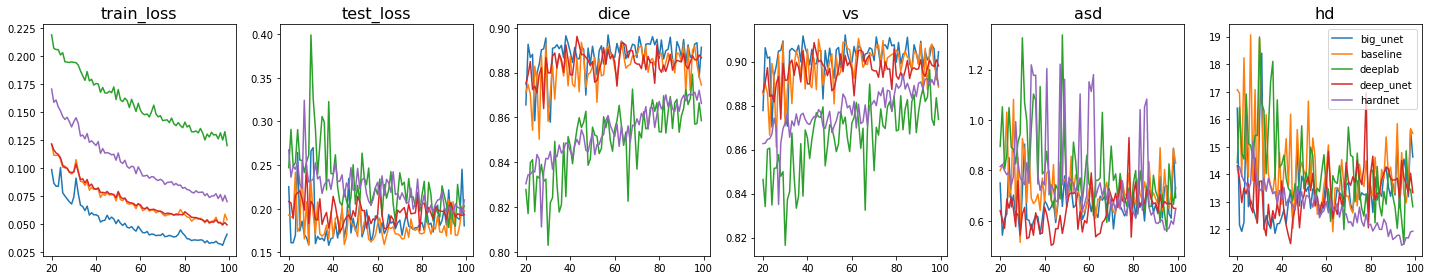

In [4]:
selects = ['baseline', 'big_unet', 'deep_unet', 'deeplab', 'hardnet']
visualize_results(results, selects)
print_results(results, selects)

      name     |  train_loss   |   test_loss   |     dice      |      vs       |      asd      |      hd       |
   scheduler   |    0.1386     |    0.1982     |    0.8832     |    0.8976     |    0.6456     |    13.3318    |
   baseline    |    0.0945     |    0.1584     |    0.8929     |    0.9087     |    0.5142     |    12.2340    |
   flooding    |    0.1073     |    0.1602     |    0.8896     |    0.9049     |    0.6161     |    12.6142    |


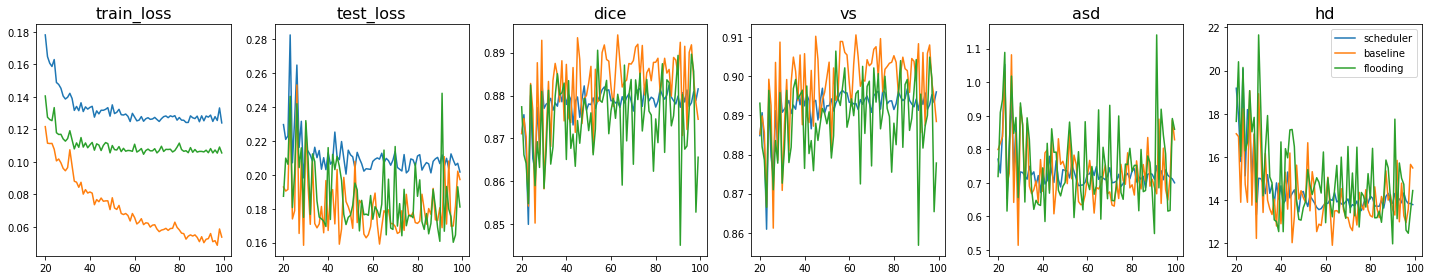

In [5]:
selects = ['baseline', 'flooding', 'scheduler']
visualize_results(results, selects)
print_results(results, selects)


      name     |  train_loss   |   test_loss   |     dice      |      vs       |      asd      |      hd       |
 augmentation  |    0.1554     |    0.1657     |    0.8922     |    0.9091     |    0.4953     |    10.7343    |
   baseline    |    0.0945     |    0.1584     |    0.8929     |    0.9087     |    0.5142     |    12.2340    |


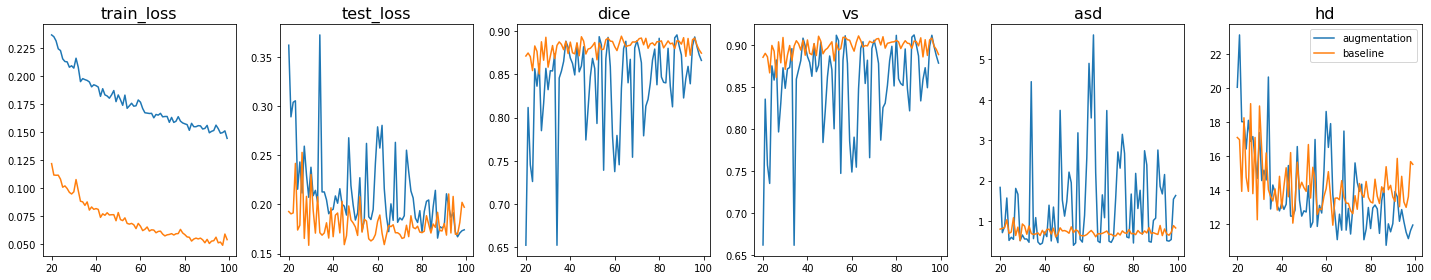

In [6]:
selects = ['baseline', 'augmentation']
visualize_results(results, selects)
print_results(results, selects)

      name     |  train_loss   |   test_loss   |     dice      |      vs       |      asd      |      hd       |
   baseline    |    0.0945     |    0.1584     |    0.8929     |    0.9087     |    0.5142     |    12.2340    |
     best      |    0.0821     |    0.1228     |    0.9094     |    0.9216     |    0.4099     |    8.9598     |
     best2     |    0.0921     |    0.1237     |    0.9111     |    0.9245     |    0.3326     |    8.7152     |


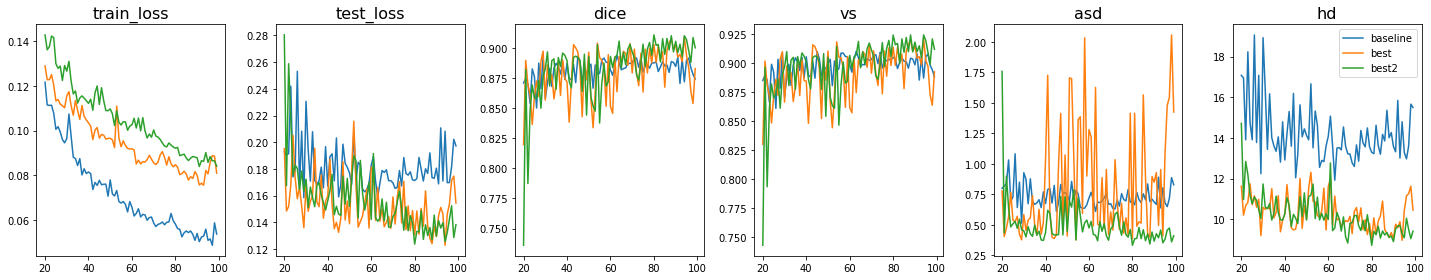

In [7]:
selects = ['baseline', 'best', 'best2']
visualize_results(results, selects)
print_results(results, selects)